# 0. Install and Import dependencies

In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5MB 32kB/s 
     |████████████████████████████████| 412.3MB 39kB/s 
     |████████████████████████████████| 245kB 44.5MB/s 
     |████████████████████████████████| 174kB 37.3MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 3.8MB 40.3MB/s 
     |████████████████████████████████| 512kB 41.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=ccc7a23eecc23a0afbeaa5a2e4f1631a478eefd905d04a47ce6217c8f751fe40
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.0 which is incompatible.
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully un

In [ ]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C # Action Critic
from stable_baselines import DQN # Deep Q network

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


# 1. Bring in Marketwatch GME Data
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=5/19/2020&endDate=05/19/2021



In [ ]:
!pip install gdown
!gdown  https://drive.google.com/uc?id=1qJAHj2UPWM6qxu7K3lxswj0qRuwxFItZ

Downloading...
From: https://drive.google.com/uc?id=1qJAHj2UPWM6qxu7K3lxswj0qRuwxFItZ
To: /content/gme_data.csv
100% 13.9k/13.9k [00:00<00:00, 6.22MB/s]


Loading Data using Pandas

In [ ]:
df = pd.read_csv('gme_data.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,05/19/2021,171.99,178.98,164.15,168.83,"4,825,905"
1,05/18/2021,174.54,189.20,168.27,180.67,"7,738,717"
2,05/17/2021,159.85,182.50,159.00,180.60,"7,372,763"
3,05/14/2021,160.00,166.47,156.22,159.92,"4,293,530"
4,05/13/2021,147.44,169.95,146.43,164.50,"8,873,487"


In [ ]:
df.shape

(253, 6)

In [ ]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [ ]:
# Change datatype of Date from object to datetime as Gym only supports that
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [ ]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
252,2020-05-19,4.58,4.75,4.37,4.44,"1,840,732"
251,2020-05-20,4.50,4.69,4.34,4.43,"2,543,609"
250,2020-05-21,4.45,4.65,4.40,4.44,"1,971,906"
249,2020-05-22,4.46,4.49,4.13,4.18,"2,379,851"
248,2020-05-26,4.34,4.61,4.33,4.42,"3,545,926"


In [ ]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-05-19,4.58,4.75,4.37,4.44,"1,840,732"
2020-05-20,4.50,4.69,4.34,4.43,"2,543,609"
2020-05-21,4.45,4.65,4.40,4.44,"1,971,906"
2020-05-22,4.46,4.49,4.13,4.18,"2,379,851"
2020-05-26,4.34,4.61,4.33,4.42,"3,545,926"


In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

# frame 0 - day 0 - day 4
# frame 1 - day 5 - day 9

In [ ]:
print("Env information:")

print("> shape:", env.shape)

print("> df.shape:", env.df.shape)

print("> action [Buy | Sell]:", env.action_space)

print("> prices.shape:", env.prices.shape)

print("> signal_features.shape:", env.signal_features.shape)

print("> max_possible_profit:", env.max_possible_profit())


Env information:
> shape: (5, 2)
> df.shape: (253, 5)
> action [Buy | Sell]: Discrete(2)
> prices.shape: (100,)
> signal_features.shape: (100, 2)
> max_possible_profit: 16.23524818624662


In [ ]:
env.prices

array([ 4.44,  4.43,  4.44,  4.18,  4.42,  4.69,  4.33,  4.06,  4.13,
        4.18,  4.44,  4.47,  4.14,  5.01,  4.96,  5.07,  4.37,  4.72,
        4.69,  4.64,  4.76,  4.95,  4.88,  4.87,  4.83,  4.41,  4.46,
        4.35,  4.38,  4.34,  4.44,  4.29,  4.24,  4.09,  4.26,  4.21,
        4.34,  4.26,  4.08,  4.19,  4.17,  3.96,  3.85,  4.01,  4.11,
        4.11,  4.03,  4.01,  3.94,  4.06,  4.1 ,  4.01,  4.15,  4.43,
        4.63,  4.43,  4.16,  4.33,  4.35,  4.52,  4.64,  4.75,  4.63,
        4.81,  4.72,  4.61,  5.03,  4.87,  4.98,  5.11,  5.25,  5.39,
        6.68,  7.65,  7.71,  7.82,  7.65,  7.7 ,  7.35,  6.23,  6.09,
        6.91,  7.09,  8.68,  9.2 ,  9.47,  8.75, 10.56, 10.04,  9.14,
       10.02, 10.09, 10.35, 10.2 ,  9.77,  9.39,  9.46,  9.13,  9.36,
       13.49])

# 2. Build Environment

In [ ]:
env.action_space

Discrete(2)

info {'total_reward': 1.6200000000000014, 'total_profit': 0.9167474057883165, 'position': 1}


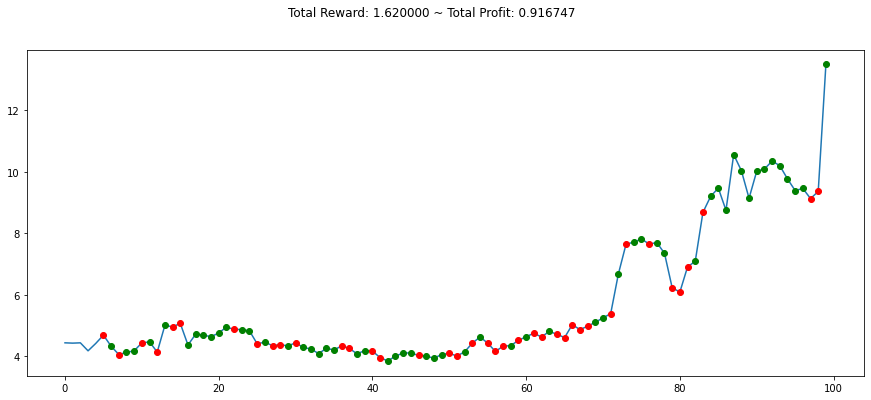

In [ ]:
state = env.reset()
while True:

    action = env.action_space.sample() # dummy
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()

env.render_all() # Trades
plt.show()

# 2.1 Add Custom Indicators

## 2.1.1. Install and Import New Dependencies

In [ ]:
!pip install finta

In [ ]:
from gym_anytrading.envs import StocksEnv
from finta import TA

## 2.1.2. Fix Volume Column

In [ ]:
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

In [ ]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

## 2.1.3. Calculate SMA, RSI and OBV

In [ ]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-05-19,4.58,4.75,4.37,4.44,1840732.0,NaN,NaN,NaN
2020-05-20,4.50,4.69,4.34,4.43,2543609.0,NaN,0.000000,-2.543609e+06
2020-05-21,4.45,4.65,4.40,4.44,1971906.0,NaN,51.851852,-5.717030e+05
2020-05-22,4.46,4.49,4.13,4.18,2379851.0,NaN,3.341289,-2.951554e+06
2020-05-26,4.34,4.61,4.33,4.42,3545926.0,NaN,49.918415,5.943720e+05
...,...,...,...,...,...,...,...,...
2021-05-13,147.44,169.95,146.43,164.50,8873487.0,161.026667,51.598624,1.406266e+09
2021-05-14,160.00,166.47,156.22,159.92,4293530.0,159.471667,49.426391,1.401973e+09
2021-05-17,159.85,182.50,159.00,180.60,7372763.0,159.839167,58.020080,1.409345e+09


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-05-19,4.58,4.75,4.37,4.44,1840732.0,0.000000,0.000000,0.0
2020-05-20,4.50,4.69,4.34,4.43,2543609.0,0.000000,0.000000,-2543609.0
2020-05-21,4.45,4.65,4.40,4.44,1971906.0,0.000000,51.851852,-571703.0
2020-05-22,4.46,4.49,4.13,4.18,2379851.0,0.000000,3.341289,-2951554.0
2020-05-26,4.34,4.61,4.33,4.42,3545926.0,0.000000,49.918415,594372.0
2020-05-27,4.57,4.71,4.36,4.69,3146603.0,0.000000,68.378974,3740975.0
2020-05-28,4.75,4.76,4.30,4.33,2184367.0,0.000000,44.713013,1556608.0
2020-05-29,4.33,4.42,4.05,4.06,3973540.0,0.000000,34.944537,-2416932.0
2020-06-01,4.12,4.36,4.02,4.13,2618424.0,0.000000,38.684620,201492.0


## 2.1.4. Create New Environments

In [ ]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size # starting row of training data
    end = env.frame_bound[1] # ending row of training data
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [ ]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals

env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [ ]:
env2.signal_features

array([[ 4.37000000e+00,  1.84073200e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 4.34000000e+00,  2.54360900e+06,  0.00000000e+00,
         0.00000000e+00, -2.54360900e+06],
       [ 4.40000000e+00,  1.97190600e+06,  0.00000000e+00,
         5.18518519e+01, -5.71703000e+05],
       [ 4.13000000e+00,  2.37985100e+06,  0.00000000e+00,
         3.34128878e+00, -2.95155400e+06],
       [ 4.33000000e+00,  3.54592600e+06,  0.00000000e+00,
         4.99184148e+01,  5.94372000e+05],
       [ 4.36000000e+00,  3.14660300e+06,  0.00000000e+00,
         6.83789740e+01,  3.74097500e+06],
       [ 4.30000000e+00,  2.18436700e+06,  0.00000000e+00,
         4.47130131e+01,  1.55660800e+06],
       [ 4.05000000e+00,  3.97354000e+06,  0.00000000e+00,
         3.49445374e+01, -2.41693200e+06],
       [ 4.02000000e+00,  2.61842400e+06,  0.00000000e+00,
         3.86846204e+01,  2.01492000e+05],
       [ 4.06000000e+00,  2.36978000e+06,  0.00000000e+00,
         4.12813698e+01

In [ ]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-05-19,4.58,4.75,4.37,4.44,1840732.0,0.0,0.000000,0.0
2020-05-20,4.50,4.69,4.34,4.43,2543609.0,0.0,0.000000,-2543609.0
2020-05-21,4.45,4.65,4.40,4.44,1971906.0,0.0,51.851852,-571703.0
2020-05-22,4.46,4.49,4.13,4.18,2379851.0,0.0,3.341289,-2951554.0
2020-05-26,4.34,4.61,4.33,4.42,3545926.0,0.0,49.918415,594372.0


# 3. Build Environment and Train

In [ ]:
# Env without Indicators
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5) # Python lambda to create multiple environment


env = DummyVecEnv([env_maker]) # Stable Baseline Class

In [ ]:
model = DQN('MlpLstmPolicy', env, verbose=1)  # Environment of model [DQN, A2C]

# Multi Layer Perceptron - Neural Network
# LSTM - Long Short Term Memory

model.learn(total_timesteps=50000)

# Higher the expained_variance closer to one, better the model predict actions.

---------------------------------
| explained_variance | -45.9    |
| fps                | 20       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.0817   |
---------------------------------
---------------------------------
| explained_variance | -63.5    |
| fps                | 344      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 0.00146  |
---------------------------------
---------------------------------
| explained_variance | -0.346   |
| fps                | 372      |
| nupdates           | 200      |
| policy_entropy     | 0.692    |
| total_timesteps    | 1000     |
| value_loss         | 0.00151  |
---------------------------------
---------------------------------
| explained_variance | -1.88    |
| fps                | 383      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| total_timest

# 3.1 Add Custom Callbacks

# 4. Evaluation

In [ ]:
# Env without Indicators
env = gym.make('stocks-v0', df=df, frame_bound=(90,100), window_size=5)

# # Env With More Indicators
# env = MyCustomEnv(df=df, window_size=12, frame_bound=(80,250))

obs = env.reset()

while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    print("Predicted Action: ",action) # Sell=0 and Buy=1
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 2.0700000000000003, 'total_profit': 1.0978295077433626, 'position': 0}


In [ ]:
df.shape

(253, 5)

In [ ]:
# Train : Test = 80% : 20%
# Train : Val : Test = 60% : 20% : 20%

# 120th coulmn
# 130th column

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(120,130), window_size=5)

obs = env.reset()
# (10,5,2)
# model.predict()

while True:
    print(obs.shape)

    # obs = obs[np.newaxis, ...]
    # print(obs.shape)
    obs = np.expand_dims(obs, axis=0)

    action, _states = model.predict(obs) #

    obs, rewards, done, info = env.step(action)

    if done:
        print("info", info)
        break

(5, 2)
(1, 5, 2)
(1, 5, 2)
(5, 2)
(1, 5, 2)
(1, 5, 2)
(5, 2)
(1, 5, 2)
(1, 5, 2)
(5, 2)
(1, 5, 2)
(1, 5, 2)
(5, 2)
(1, 5, 2)
(1, 5, 2)
(5, 2)
(1, 5, 2)
(1, 5, 2)
(5, 2)
(1, 5, 2)
(1, 5, 2)
(5, 2)
(1, 5, 2)
(1, 5, 2)
(5, 2)
(1, 5, 2)
(1, 5, 2)
info {'total_reward': -2.8900000000000006, 'total_profit': 0.8113939621973711, 'position': 1}


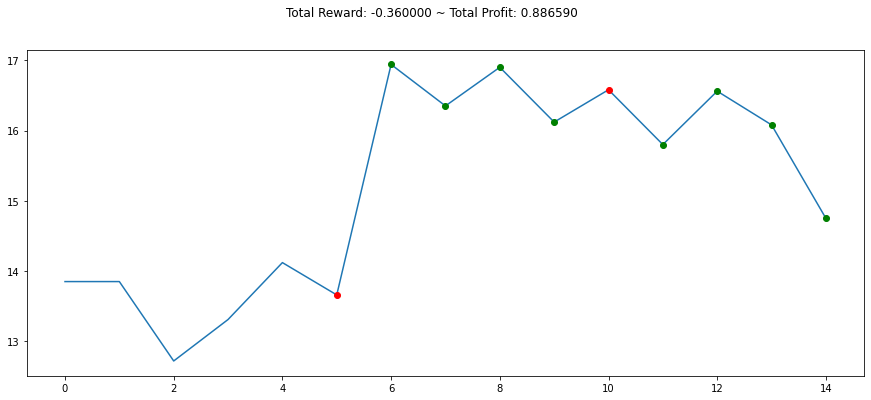

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()